# Julia tests
This python notebook simply uses the available julia scripts in order to test their functionality. Julia's plotting capabilities are not very efficient, so that is better done in Python

In [1]:
long_sims = True

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from julia import Main
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

basedir = ""

Ha_eV = 27.211386245988 


def cube_disp(kx,ky,kz):
    
    dx = 1
    dy = 1
    dz = 1
    
    return np.cos(kx*dx) + np.cos(ky*dy) + np.cos(kz*dz)

# Density of states

## Density of states of 3d tight-binding cubic lattice, small lattice
The 3D TB cubic lattice can be obtained with a slater-koster parametrization. The exact position of the DoS peaks for a small lattice are known and are checked here

In [3]:
Main.include(basedir + "test3D_dos.jl")
L = 4
N = 200
mater = "3DTB"
a = Main.test(L*2,N, mater)
b = Main.test(L*2,N*2, mater)


0

[0.         1.57079633 3.14159265 4.71238898]


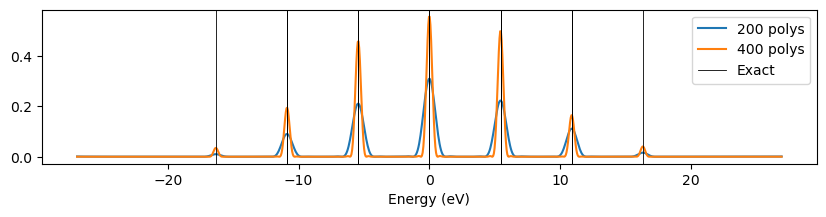

In [4]:
fig, axs = plt.subplots(figsize=(10,2))

axs.plot(a[:,0], a[:,1], label = f"{N} polys")
axs.plot(b[:,0], b[:,1], label = f"{N*2} polys")

ks = np.array([2*np.pi/L*i for i in range(L)])
print(ks)
for kx in ks:
    for ky in ks:
        for kz in ks:
            E = cube_disp(kx,ky,kz)*Ha_eV*0.1*2
            axs.axvline(E, c='k', linewidth=0.6)
axs.axvline(E, c='k', linewidth=0.6, label="Exact")
axs.set_xlabel("Energy (eV)")
axs.legend()
plt.show()

## DoS 3DTB large lattice

In [5]:
# Main.include(basedir + "test3D_dos.jl")
L = 32
N = 400
mater = "3DTB"
dos = Main.test(L*2,N, mater)


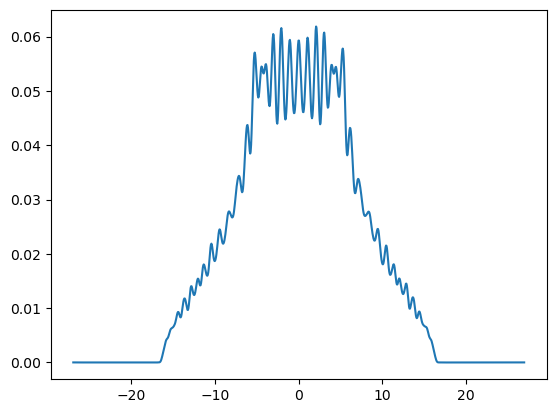

In [6]:
plt.plot(dos[:,0], dos[:,1])
plt.show()

## Dos all materials

In [7]:
Main.include(basedir + "test3D_dos.jl")

In [8]:
materials = ["gold", "palladium", "aluminium", "silver"]

L = 32
N = 500

dos_list = [Main.test(L,N,material) for material in materials]

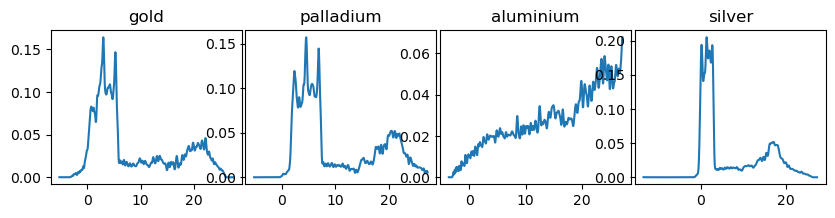

In [9]:

fig, axs = plt.subplots(1,4,figsize=(10,2), sharey=False)
plt.subplots_adjust(wspace=0.02)

for material, dos, ax in zip(materials, dos_list, axs):
    ax.plot(dos[:,0], dos[:,1])
    ax.set_title(material)

plt.show()

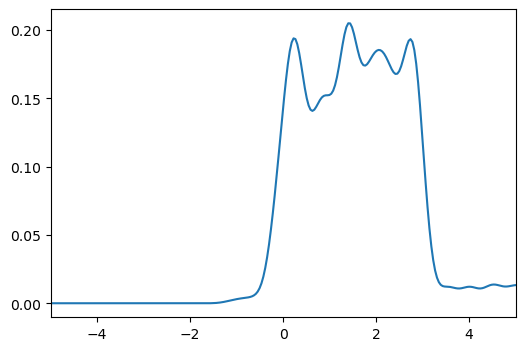

In [18]:
dos = dos_list[3]

fig, axs = plt.subplots(1,1,figsize=(6,4))
axs.plot(dos[:,0], dos[:,1])
axs.set_xlim(-5,5)
plt.show()


# Band structure

## 3D TB

In [10]:
Main.include(basedir + "test3D_bands.jl")
bands = Main.test("3DTB")

In [11]:
# Create k-path

kpp = 30

dks = [0.2, 0.1, 0.14, 0.17, 0.27]
k = 0
kpath = [k]
for dk in dks:
    k += dk
    kpath.append(k)
    
print(kpath)

Npaths = len(kpath)
ks = []
for i in range(Npaths-1):
    ki = kpath[i]
    kf = kpath[i+1]
    ks = ks + list(np.linspace(ki,kf, kpp))[:-1]

ks.append(kpath[-1])

print(len(ks))

[0, 0.2, 0.30000000000000004, 0.44000000000000006, 0.6100000000000001, 0.8800000000000001]
146


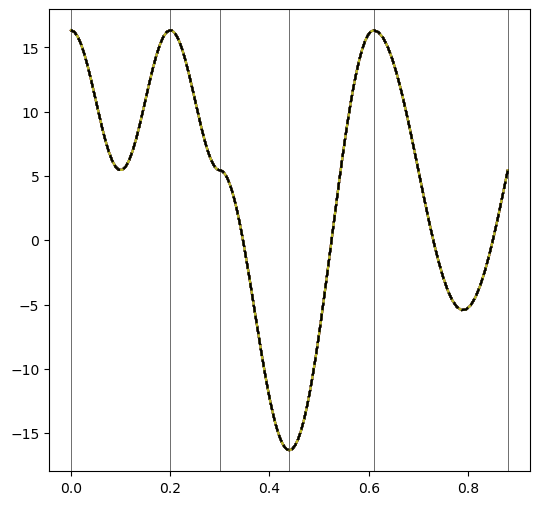

In [12]:

fig, axs = plt.subplots(figsize=(6.2,6))
xs = [(kpp-1)*i for i in range(Npaths)]

No = 9
for i in range(No):
    band = bands[:,i+3]*Ha_eV
    kx   = bands[:,0]*2*np.pi
    ky   = bands[:,1]*2*np.pi
    kz   = bands[:,2]*2*np.pi
    
    cube = 0.2*cube_disp(kx, ky, kz)
    axs.plot(ks, band)
    plt.plot(ks, cube*Ha_eV, 'k--')
    

for x in xs:
    axs.axvline(ks[x], c='k', linewidth=0.4)

## Band structures of all materials

In [13]:
materials = ["gold", "palladium", "aluminium", "silver"]
fermis    = np.array([0.5380, 0.5190, 0.30975, 0.4635])/2*Ha_eV
No = 9

xs = [(kpp-1)*i for i in range(Npaths)]
band_list = [Main.test(material) for material in materials]

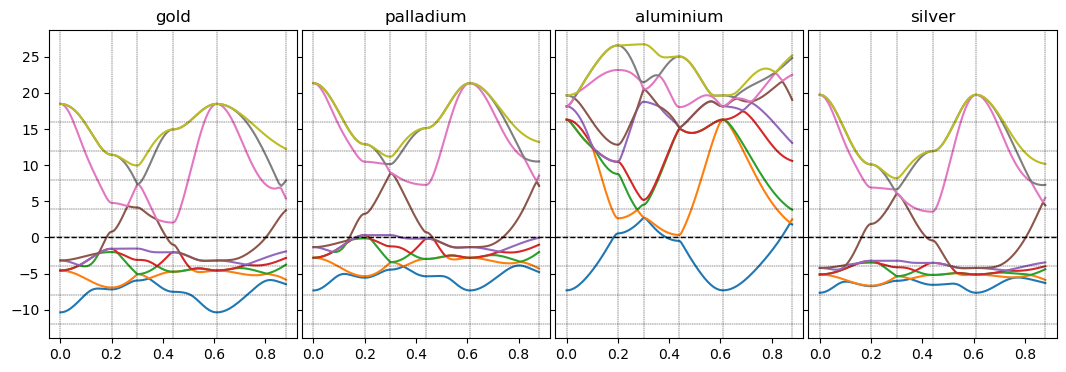

In [14]:

fig, axs = plt.subplots(1,4,figsize=(13,4), sharey=True)
plt.subplots_adjust(wspace=0.02)

for bands, ax, material, fermi in zip(band_list, axs, materials, fermis):
    ax.set_title(material)
    for i in range(No):
        band = bands[:,i+3]*Ha_eV
        ax.plot(ks, band - fermi)

    for x in xs: 
        ax.axvline(ks[x], linewidth=0.3, linestyle='--', c='k')
    for i in range(-3,5):
        ax.axhline(i*4, linewidth=0.3, linestyle='--', c='k')
    ax.axhline(0, linewidth=1, linestyle='--', c='k')

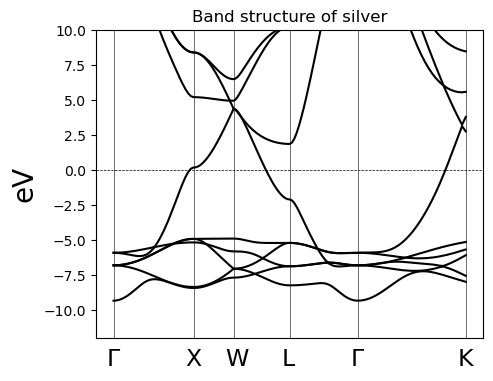

In [15]:
index = 3
material = materials[index]
bands = band_list[index]

fig, ax = plt.subplots(1,1,figsize=(5,4))

Ef = 8
ax.set_title("Band structure of " + material)
ax.set_ylabel("eV", fontsize=20)
for i in range(No):
    band = bands[:,i+3]*Ha_eV
    ax.plot(ks, band-Ef, color='k')

points = [r"$\Gamma$", "X", "W", "L", r"$\Gamma$", "K"]
for x,p in zip(xs, points): 
    ax.axvline(ks[x], c='k', linewidth=0.4)
    ax.text(ks[x]-0.02,-6-Ef,p, fontsize=17)

ax.set_ylim([-12,10])
ax.axhline(0, linestyle='--', color='k', linewidth=0.5)
ax.get_xaxis().set_visible(False)

## Present
Get band structure of Gold and Silver

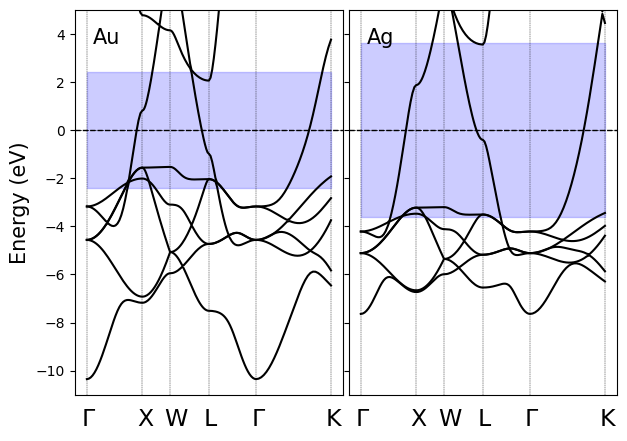

In [16]:
points = [r"$\Gamma$", "X", "W", "L", r"$\Gamma$", "K"]
materials = ["Au", "Ag"]
LSPRs = [2.4, 3.6]

fig, axs = plt.subplots(1,2,figsize=(7,5), sharey=True)
plt.subplots_adjust(wspace=0.02)
indices = [0,3]

for i, index in enumerate(indices):
    material = materials[i]
    bands = band_list[index]
    fermi = fermis[index]
    ax    = axs[i]
    LSPR  = LSPRs[i]
    
    # ax.set_title(material)
    for j in range(No):
        band = bands[:,j+3]*Ha_eV
        ax.plot(ks, band - fermi, c='k')

    for x,p in zip(xs, points): 
        ax.axvline(ks[x], linewidth=0.3, linestyle='--', c='k')
        ax.text(ks[x]-0.02,-4.3-Ef,p, fontsize=17)
        
    ax.axhline(0, linewidth=1, linestyle='--', c='k')
    ax.set_ylim([-11,5])
    ax.axhline(0, linestyle='--', color='k', linewidth=0.5)
    ax.text(0.02, 3.6, material, fontsize=15)
    ax.fill_between(ks, np.array(ks)*0 - LSPR, np.array(ks)*0 + LSPR, color='blue', alpha=0.2)
    ax.get_xaxis().set_visible(False)

axs[0].set_ylabel("Energy (eV)", fontsize=15)
plt.show()

## DoS + BS

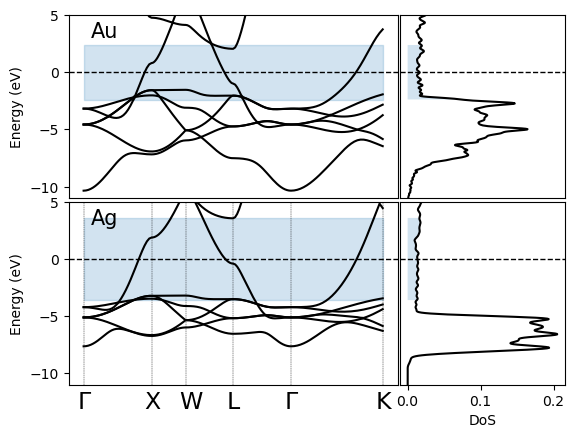

In [75]:

materials = ["Au", "Ag"]
LSPRs = [2.4, 3.6]

fig = plt.figure()
# fig5 = plt.figure(constrained_layout=True)
widths  = [2, 1]
heights = [2, 2]
specs = fig.add_gridspec(ncols=2, nrows=2, 
                         width_ratios=widths, height_ratios=heights,
                         hspace=0.02, wspace=0.01)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[0,1], sharey=ax1)
ax3 = fig.add_subplot(specs[1,0], sharex=ax1)
ax4 = fig.add_subplot(specs[1,1], sharey=ax3, sharex=ax2)
axs = [[ax1, ax2], [ax3, ax4]]
ax2.tick_params(left = False)
ax2.tick_params(bottom = False)
ax4.tick_params(left = False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)

indices = [0,3]

for i, index in enumerate(indices):
    
    material = materials[i]
    bands = band_list[index]
    fermi = fermis[index]
    ax = axs[i][0]
    
    LSPR  = LSPRs[i]
    
    for j in range(No):
        band = bands[:,j+3]*Ha_eV
        ax.plot(ks, band - fermi, c='k')

        
    ax.axhline(0, linewidth=1, linestyle='--', c='k')
    ax.set_ylim([-11,5])
    # ax.axhline(0, linestyle='--', color='k', linewidth=0.5)
    ax.text(0.02, 3.0, material, fontsize=15)
    ax.fill_between(ks, np.array(ks)*0 - LSPR, np.array(ks)*0 + LSPR, color='C0', alpha=0.2)
    ax.get_xaxis().set_visible(False)

    
    ax = axs[i][1]
    dos = dos_list[index]
    ax.axhline(0, linewidth=1, linestyle='--', c='k')
    
    ax.plot(dos[:,1], dos[:,0] - Ef, color='k')
    
    bet = np.where(np.logical_and(dos[:,0]>=Ef-LSPR, dos[:,0]<=Ef+LSPR))
    # bet = list(*bet)
    ax.fill_betweenx(dos[*bet,0] - Ef, 0, dos[*bet,1], alpha=0.2)

ax = axs[1][0]
for x,p in zip(xs, points): 
    ax.axvline(ks[x], linewidth=0.3, linestyle='--', c='k')
    ax.text(ks[x]-0.02,-5.1-Ef,p, fontsize=17)

for i in range(2):
    axs[i][0].set_ylabel("Energy (eV)")
axs[1][0].set_xlabel("k path")
axs[1][1].set_xlabel("DoS")


plt.show()

### 

In [85]:
frequencies = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.2,1.4,1.6,1.8,2.0,2.1,2.2,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.2,5.4,5.6,5.8,6.0,6.2,6.4,6.6,6.8,7.0,7.2,7.4,7.6,7.8,8.0,8.2,8.4,8.6,8.8,9.0,9.2,9.4,9.6,9.8,10.0])

# real part of dielectric constant of bulk al
eps_real = np.array([-6794.06,-1736.856,-772.9723,-433.5408,-275.74,-189.81,-138.0141,-104.2117,-81.1576,-64.464,-42.7616,-29.5872,-20.7872,-14.5843,-9.9687,-8.0332,-6.394,-3.2096,-1.8557,-0.834,-0.9135,-1.0013,-0.9541,-0.8684,-0.9045,-0.8684,-0.7659,-0.664,-0.4965,-0.3685,-0.3729,-0.5472,-0.748,-0.8736,-0.924,-0.978,-1.0304,-1.1095,-1.2051,-1.1661,-1.0767,-0.9656,-0.8587,-0.7317,-0.4959,-0.3048,-0.1488,0.0241,0.1888,0.3495,0.46,0.5928,0.7491,0.8931,0.9471,0.9828,0.944,0.8424,0.7945,0.8436,0.8979,0.9417,0.9765,1.0011,1.06,1.1605,1.2412,1.2528,1.2369])

# imaginary part of dielectric constant of bulk al
eps_imag = np.array([1353.4422,177.7698,55.0836,24.5794,12.9558,7.7168,5.17,3.6756,2.703,2.0878,1.308,0.8704,0.7296,0.6876,0.8216,1.0224,1.2192,1.86,2.6076,3.8192,4.9192,5.1684,5.37,5.544,5.5748,5.544,5.518,5.4912,5.4668,5.6052,5.74,5.8354,5.7558,5.611,5.4058,5.2688,5.133,4.9632,4.698,4.394,4.1656,3.975,3.7884,3.6356,3.388,3.2186,3.0734,2.904,2.7816,2.7032,2.625,2.5654,2.522,2.546,2.584,2.6496,2.7048,2.673,2.5152,2.392,2.314,2.3056,2.2532,2.158,2.1222,2.0748,2.1216,2.1646,2.192])


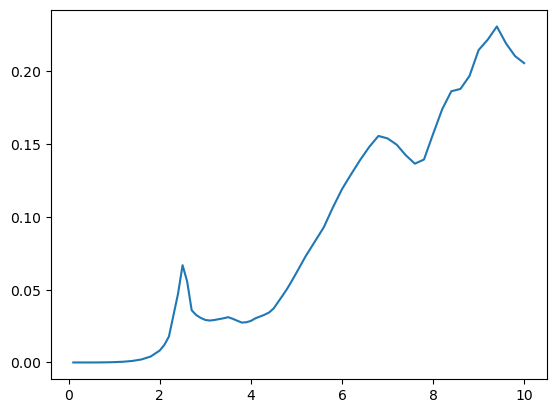

In [88]:
# plt.plot(frequencies, eps_real)
# plt.plot(frequencies, eps_imag)
# plt.show()


em = 1

e = eps_real + 1j*eps_imag
alpha = em/(e - em)

plt.plot(frequencies, np.abs(alpha)**2)
plt.show()

In [96]:
freqs = np.array([0.040, 0.050, 0.060, 0.070, 0.080, 0.090, 0.100, 0.125, 0.150, 0.175, 0.200, 0.250, 0.300, 0.350, 0.400, 0.500, 0.600, 0.700, 0.800, 0.900, 1.000, 1.100, 1.200, 1.300, 1.400, 1.500, 1.600, 1.700, 1.800, 1.900, 2.000, 2.200, 2.400, 2.600, 2.800, 3.000, 3.200, 3.400, 3.600, 3.800, 4.000, 4.200, 4.400, 4.600, 4.800, 5.000, 6.000, 6.500, 7.000, 7.500, 8.000, 8.500, 9.000, 9.500, 10.000, 10.500, 11.000, 11.500, 12.000, 12.500, 13.000, 13.500, 14.000, 14.200, 14.400, 14.600, 14.800, 15.000, 15.200, 15.400, 15.600, 15.800, 16.000, 16.200, 16.400, 16.750, 17.000, 17.250, 17.500, 17.750, 18.000, 18.500, 19.000, 19.500, 20.000, 20.500, 21.000, 21.500, 22.000, 22.500, 23.000, 23.500, 24.000, 24.500, 25.000, 25.500, 26.000, 27.000, 28.000, 29.000, 30.000, 35.000, 40.000, 45.000, 50.000, 55.000, 60.000, 65.000, 70.000, 72.500, 75.000, 77.500, 80.000, 85.000, 90.000, 95.000, 100.000, 110.000, 120.000, 130.000, 140.000, 150.000, 160.000, 170.000, 180.000, 190.000, 200.000, 220.000, 240.000, 260.000, 280.000, 300.000])
n = np.array([98.595, 74.997, 62.852, 53.790, 45.784, 39.651, 34.464, 24.965, 18.572, 14.274, 11.733, 8.586, 6.759, 5.438, 4.454, 3.072, 2.273, 1.770, 1.444, 1.264, 1.212, 1.201, 1.260, 1.468, 2.237, 2.745, 2.625, 2.143, 1.741, 1.488, 1.304, 1.018, 0.826, 0.695, 0.598, 0.523, 0.460, 0.407, 0.363, 0.326, 0.294, 0.267, 0.244, 0.223, 0.205, 0.190, 0.130, 0.110, 0.095, 0.082, 0.072, 0.063, 0.056, 0.049, 0.044, 0.040, 0.036, 0.033, 0.033, 0.034, 0.038, 0.041, 0.048, 0.053, 0.058, 0.067, 0.086, 0.125, 0.178, 0.234, 0.280, 0.318, 0.351, 0.380, 0.407, 0.448, 0.474, 0.498, 0.520, 0.540, 0.558, 0.591, 0.620, 0.646, 0.668, 0.689, 0.707, 0.724, 0.739, 0.753, 0.766, 0.778, 0.789, 0.799, 0.809, 0.817, 0.826, 0.840, 0.854, 0.865, 0.876, 0.915, 0.940, 0.957, 0.969, 0.979, 0.987, 0.995, 1.006, 1.025, 1.011, 1.008, 1.007, 1.007, 1.005, 0.999, 0.991, 0.994, 0.991, 0.987, 0.989, 0.990, 0.989, 0.989, 0.990, 0.990, 0.991, 0.992, 0.993, 0.993, 0.994, 0.995])
k = np.array([203.701, 172.199, 150.799, 135.500, 123.734, 114.102, 105.600, 89.250, 76.960, 66.930, 59.370, 48.235, 40.960, 35.599, 31.485, 25.581, 21.403, 18.328, 15.955, 14.021, 12.464, 11.181, 10.010, 8.949, 8.212, 8.309, 8.597, 8.573, 8.205, 7.821, 7.479, 6.846, 6.283, 5.800, 5.385, 5.024, 4.708, 4.426, 4.174, 3.946, 3.740, 3.552, 3.380, 3.222, 3.076, 2.942, 2.391, 2.173, 1.983, 1.814, 1.663, 1.527, 1.402, 1.286, 1.178, 1.076, 0.979, 0.883, 0.791, 0.700, 0.609, 0.517, 0.417, 0.373, 0.327, 0.273, 0.211, 0.153, 0.108, 0.184, 0.073, 0.065, 0.060, 0.055, 0.050, 0.045, 0.042, 0.040, 0.038, 0.036, 0.035, 0.032, 0.030, 0.028, 0.027, 0.025, 0.024, 0.023, 0.022, 0.021, 0.021, 0.020, 0.019, 0.018, 0.018, 0.017, 0.016, 0.015, 0.014, 0.014, 0.013, 0.010, 0.008, 0.007, 0.006, 0.005, 0.004, 0.004, 0.004, 0.004, 0.024, 0.025, 0.024, 0.028, 0.031, 0.036, 0.030, 0.025, 0.024, 0.021, 0.016, 0.015, 0.014, 0.011, 0.010, 0.009, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002])

In [97]:
e1 = n**2 - k**2
e2 = 2*n*k

eps = e1 + 1j*e2

In [111]:
# for ep in eps:
for freq in freqs:
    # print(f"{np.real(ep):4.4f}", end=", ")
    # print(f"{np.imag(ep):4.4f}", end=", ")
    print(f"{freq:4.2f}", end=", ")
    
    

0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.12, 0.15, 0.17, 0.20, 0.25, 0.30, 0.35, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00, 1.10, 1.20, 1.30, 1.40, 1.50, 1.60, 1.70, 1.80, 1.90, 2.00, 2.20, 2.40, 2.60, 2.80, 3.00, 3.20, 3.40, 3.60, 3.80, 4.00, 4.20, 4.40, 4.60, 4.80, 5.00, 6.00, 6.50, 7.00, 7.50, 8.00, 8.50, 9.00, 9.50, 10.00, 10.50, 11.00, 11.50, 12.00, 12.50, 13.00, 13.50, 14.00, 14.20, 14.40, 14.60, 14.80, 15.00, 15.20, 15.40, 15.60, 15.80, 16.00, 16.20, 16.40, 16.75, 17.00, 17.25, 17.50, 17.75, 18.00, 18.50, 19.00, 19.50, 20.00, 20.50, 21.00, 21.50, 22.00, 22.50, 23.00, 23.50, 24.00, 24.50, 25.00, 25.50, 26.00, 27.00, 28.00, 29.00, 30.00, 35.00, 40.00, 45.00, 50.00, 55.00, 60.00, 65.00, 70.00, 72.50, 75.00, 77.50, 80.00, 85.00, 90.00, 95.00, 100.00, 110.00, 120.00, 130.00, 140.00, 150.00, 160.00, 170.00, 180.00, 190.00, 200.00, 220.00, 240.00, 260.00, 280.00, 300.00, 